# TikTok Project

You are a data professional at TikTok. The current project is reaching its midpoint; a project proposal, Python coding work, and exploratory data analysis have all been completed.

The team has reviewed the results of the exploratory data analysis and the previous executive summary the team prepared. You received an email from Orion Rainier, Data Scientist at TikTok, with your next assignment: determine and conduct the necessary hypothesis tests and statistical analysis for the TikTok classification project.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

## Scenario

The TikTok data analytics team has completed the first three milestones of the claims classification project and is nearing the halfway point. So far, the team has completed a project proposal, and used Python to perform exploratory data analysis on the dataset for the claims classification project. The team also produced data visualizations in both Python and Tableau to share with stakeholders. The next step is to use statistical methods to analyze and interpret the claims classification data. 

You receive a new email from Mary Joanna Rodgers, one of TikTok’s project management officers. Mary Joanna informs the data team about a new request: to determine whether there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts. You also receive follow-up emails from Data Science Manager, Rosie Mae Bradshaw and Data Science Lead, Willow Jaffey. These emails share the details of the analysis. A final email from Data Scientist, Orion Rainier, details your next assignment: to conduct a hypothesis test on verified versus unverified accounts in terms of video view count.

### Project Question

to determine whether there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts

## Data exploration and hypothesis testing

The purpose of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

The goal is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats

In [5]:
#Let's import the data
df = pd.read_csv('tiktok_dataset.csv')
df = df.set_index('#')
df.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
#,,,,,,,,,,,
1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19382 entries, 1 to 19382
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_id                  19382 non-null  int64  
 2   video_duration_sec        19382 non-null  int64  
 3   video_transcription_text  19084 non-null  object 
 4   verified_status           19382 non-null  object 
 5   author_ban_status         19382 non-null  object 
 6   video_view_count          19084 non-null  float64
 7   video_like_count          19084 non-null  float64
 8   video_share_count         19084 non-null  float64
 9   video_download_count      19084 non-null  float64
 10  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.8+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
#let's drop rows with missing values
df = df.dropna()

In [32]:
df.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


We are interested in the relationship between verified_status and video_view_count. One approach is to examine the mean value of video_view_count for each group of verified_status in the sample data.

In [14]:
df.groupby(['verified_status'])['video_view_count'].mean().to_frame().round()

,video_view_count
verified_status,
not verified,265664.0
verified,91439.0


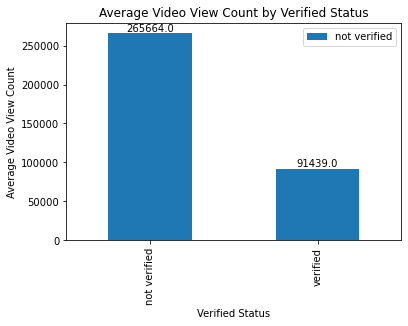

In [29]:
grouped_data =df.groupby(['verified_status'])['video_view_count'].mean().to_frame().round()


# Create the bar plot with custom colors
ax = grouped_data.plot(kind='bar' ,legend= False)


# Add value labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# Adding axis labels
plt.xlabel('Verified Status')
plt.ylabel('Average Video View Count')

# Adding title
plt.title('Average Video View Count by Verified Status')

# Create a legend for each verified status
plt.legend(df['verified_status'])

# Displaying the plot
plt.show()

## Hypothesis testing

𝐻0 : There is no difference in the average video view count between verified  and non-verified.

𝐻𝐴 : There is a difference in the average video view count between verified  and non-verified.

## Let's conduct two sample test to compare means

In [16]:
#select data where the verified is the status
verified = df[df['verified_status'] == 'verified']

#select data where not verified is the status
not_verified = df[df['verified_status'] == 'not verified']

Let's choose 5% as the significance level and proceed with a two-sample t-test

In [17]:
stats.ttest_ind(a=verified['video_view_count'], b=not_verified['video_view_count'], equal_var=False)

Ttest_indResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120)

# Conclusion

The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait-y videos? Or are unverified accounts associated with spam bots that help inflate view counts?

The next step will be to build a regression model on verified_status. A regression model is the natural next step because the end goal is to make predictions on claim status. A regression model for verified_status can help analyze user behavior in this group of verified users. Technical note to prepare regression model: because the data is skewed, and there is a significant difference in account types, it will be key to build a logistic regression model. 